# The Sparks Foundation

## Shubham Shinde.

### GRIPSEPT21

### #Task 1    

#### Problem Statement 
Predict the percentage of student based on the no of study hours

In [2]:
#Importing necessary libraries / Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [3]:
## Importing CSV File
url='http://bit.ly/w-data'
df=pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Checking Data Information

In [4]:
## Checking Shape of data
df.shape

(25, 2)

In [5]:
## Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
## Checking Missing values if any
df.isna().sum()

Hours     0
Scores    0
dtype: int64

No missing value found.

In [7]:
## Checking Duplicate values if any
df.duplicated().sum()

0

No duplicate value found

<AxesSubplot:>

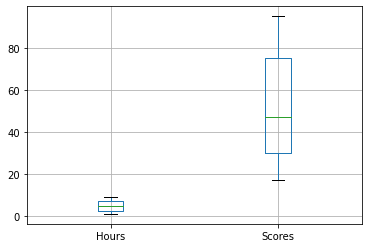

In [8]:
## Checking Outliers using boxplot
df.boxplot()

No Outliers Found.

Text(0.5, 1.0, 'Hours vs Score')

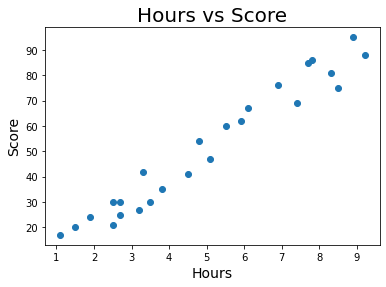

In [9]:
## Plotting the distribution of score to check linear relationship with hours.
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel('Hours',fontsize=14)
plt.ylabel('Score',fontsize=14)
plt.title('Hours vs Score',fontsize=20)

###### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score

## Implementation of Linear Regression without Splitting the data

In [10]:
# x => independent Variable
# y => dependent Variable

x=df[['Hours']]
y=df["Scores"]


In [11]:
x.shape,y.shape

((25, 1), (25,))

In [12]:
## Model Training
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [13]:
## Model Testing
ypred=model.predict(x)
ypred

array([26.92318188, 52.3402707 , 33.76624426, 85.57800223, 36.69898527,
       17.14737849, 92.4210646 , 56.25059205, 83.62284155, 28.87834256,
       77.75735951, 60.16091341, 46.47478866, 34.74382459, 13.23705714,
       89.48832358, 26.92318188, 21.05769985, 62.11607409, 74.8246185 ,
       28.87834256, 49.40752968, 39.63172629, 69.9367168 , 78.73493985])

In [14]:
## Evaluation of model
mae=mean_absolute_error(y,ypred)
mse=mean_squared_error(y,ypred)
rmse=np.sqrt(mse)
R2_score=r2_score(y,ypred)

print(f'Mean Absolute Error : {mae}')
print(f'Mean Squared Error : {mse}')
print(f'Root Mean Squared Error : {rmse}')
print(f'R2 Score : {R2_score}')

Mean Absolute Error : 4.972805319866375
Mean Squared Error : 28.88273050924546
Root Mean Squared Error : 5.374265578592619
R2 Score : 0.9529481969048356


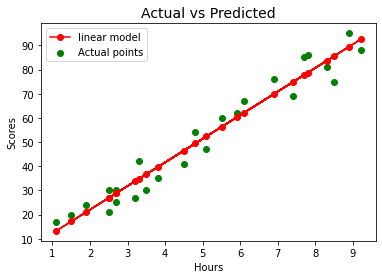

In [15]:
## Plot of Actual vs predicted
plt.scatter(x,y,color="g", label="Actual points")
plt.plot(x,ypred,color="r",marker="o",label="linear model")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title('Actual vs Predicted',fontsize=14)
plt.legend()

In [16]:
## Actual vs Predicted Values
output1=pd.DataFrame({"Actual":y,"Predicted":ypred})
output1

,Actual,Predicted
0,21,26.923182
1,47,52.340271
2,27,33.766244
3,75,85.578002
4,30,36.698985
5,20,17.147378
6,88,92.421065
7,60,56.250592
8,81,83.622842
9,25,28.878343


## Implementation of Linear Regression on  Splitted Data

In [17]:
## Splitting data into training and testing
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
xtest.shape,ytest.shape

((5, 1), (5,))

In [19]:
## Model Training
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [20]:
## Model Testing
ypred=model.predict(xtest)
ypred.reshape

<function ndarray.reshape>

##### Plot of Actual vs Predicted values

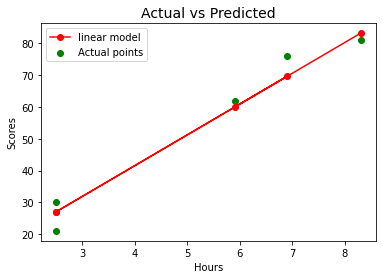

In [21]:
plt.scatter(xtest,ytest,color="g", label="Actual points")
plt.plot(xtest,ypred,color="r",marker="o",label="linear model")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title('Actual vs Predicted',fontsize=14)
plt.legend()

In [22]:
## slope(m)
model.coef_

array([9.68207815])

In [23]:
## Constant value(c)
model.intercept_

2.826892353899737

In [24]:
## Evaluation of model
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
R2_score=r2_score(ytest,ypred)

print(f'Mean Absolute Error : {mae}')
print(f'Mean Squared Error : {mse}')
print(f'Root Mean Squared Error : {rmse}')
print(f'R2 Score : {R2_score}')

Mean Absolute Error : 3.9207511902099244
Mean Squared Error : 18.943211722315272
Root Mean Squared Error : 4.352380006653288
R2 Score : 0.9678055545167994


#### R2 score is improved by 1.5 % when we train our model on splitted data. Initially it was 0.95 and after splitting it was 0.967 which is good.

In [25]:
## Actual vs Predicted Values
output2=pd.DataFrame({"Actual":ytest,"Predicted":ypred})
output2

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


### Predicted score if student study for 9.25 hr /day

In [29]:
# y=mx+c
## y=score
## m=slope=model.coef
## c=constant=model.intercept_

score= (model.coef_*9.25)+model.intercept_
score
print(f'Predicted Score if Student study for 9.25 hr/day is {score[0].round(2)}')

Predicted Score if Student study for 9.25 hr/day is 92.39


In [30]:
## or taking input from user

x=float(input('no of hours:'))

score= (model.coef_*x)+model.intercept_
print(f'Predicted Score if Student study for 9.25 hr/day is {score[0].round(2)}')

Enter no of hours:9.25
Predicted Score if Student study for 9.25 hr/day is 92.39
